In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

In [2]:
json_file_path = 'DATA/0724-7DT-Y1/all_data.json'

with open(json_file_path,'r') as file:
    data_list = json.load(file)

In [3]:
# 提取时间戳并计算时间差
base_stamp = data_list[0]["header"]["stamp"]
time = []
for data in data_list:
    stamp = data["header"]["stamp"]
    delta_secs = stamp["secs"] - base_stamp["secs"]
    delta_nsecs = stamp["nsecs"] - base_stamp["nsecs"]
    time.append(delta_secs + delta_nsecs * 1e-9)
time = np.array(time)
time

array([0.00000000e+00, 9.90966300e-03, 1.99940710e-02, ...,
       2.30189900e+02, 2.30199903e+02, 2.30209896e+02])

In [4]:
# 提取每个时间点的数据
q_list = np.array([data["robot_state"]["q"] for data in data_list])

dq_list = np.array([data["robot_state"]["dq"] for data in data_list])

tau_J_list = np.array([data["robot_state"]["tau_J"] for data in data_list])

tau_ext_list = np.array([data["robot_state"]["tau_ext_hat_filtered"] for data in data_list]) 

In [5]:
# 平均每个关节的值
q_avg = q_list.mean(axis=1)
dq_avg = dq_list.mean(axis=1)
tau_J_avg = tau_J_list.mean(axis=1)
tau_ext_avg = tau_ext_list.mean(axis = 1)

In [6]:
# 定义 STFT 参数
fs = 1 / np.mean(np.diff(time))  # 采样频率
nperseg = len(time) // 2  # 每段的长度，调整为合适的值

In [7]:
# 计算 STFT
f_q, t_q, Zxx_q = stft(q_avg, fs=fs, nperseg=nperseg)
f_dq, t_dq, Zxx_dq = stft(dq_avg, fs=fs, nperseg=nperseg)
f_tau_J, t_tau_J, Zxx_tau_J = stft(tau_J_avg, fs=fs, nperseg=nperseg)
f_tau_ext, t_tau_ext, Zxx_tau_ext = stft(tau_ext_avg, fs=fs, nperseg=nperseg)

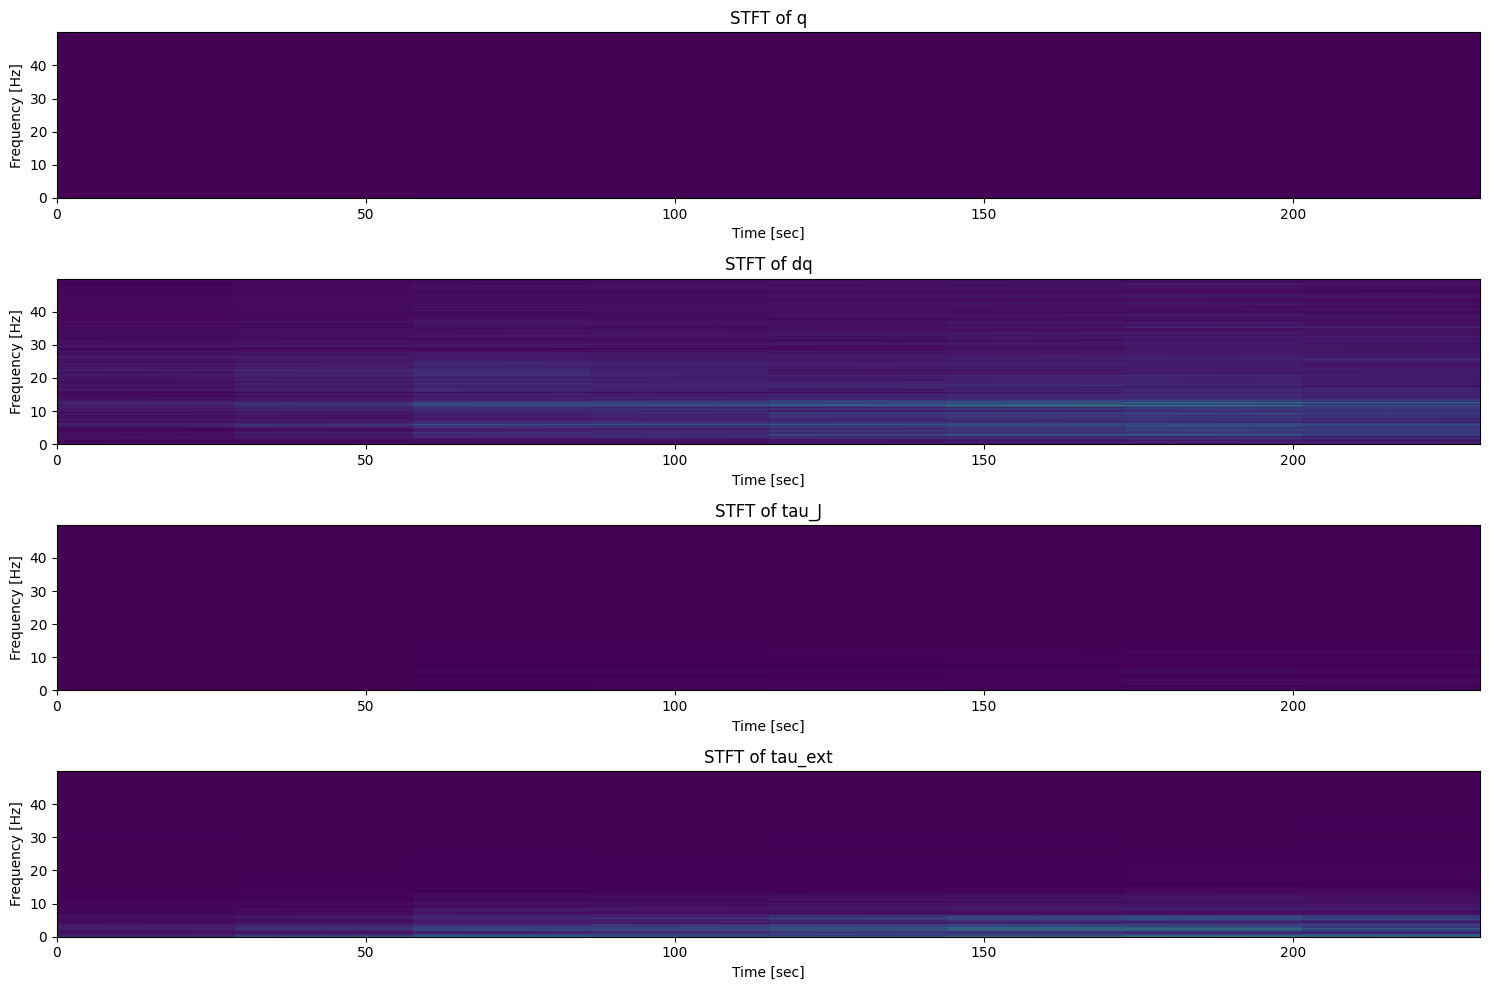

In [8]:
# 画出时频图
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.pcolormesh(t_q, f_q, np.abs(Zxx_q), shading='gouraud')
plt.title('STFT of q')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(4, 1, 2)
plt.pcolormesh(t_dq, f_dq, np.abs(Zxx_dq), shading='gouraud')
plt.title('STFT of dq')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(4, 1, 3)
plt.pcolormesh(t_tau_J, f_tau_J, np.abs(Zxx_tau_J), shading='gouraud')
plt.title('STFT of tau_J')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(4, 1, 4)
plt.pcolormesh(t_tau_ext, f_tau_ext, np.abs(Zxx_tau_ext), shading='gouraud')
plt.title('STFT of tau_ext')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.tight_layout()
plt.show()